In [1]:
import pandas as pd
import numpy as np
from datetime import datetime 
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly


mpl.rcParams['figure.figsize']=(16,9)
pd.set_option('display.max_rows', 500)
sns.set(style="darkgrid")

import plotly.graph_objects as go

# Data Preparation

1. focus is always to understand the final data structure
2. support each step by visual analytics

## Johns Hopkins GITHUB csv data

In [2]:
datapath= 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [3]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22,6/28/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,181666,181725,181808,181912,181987,182033,182072,182149,182228,182324
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,277409,277444,277663,277940,278211,278504,278793,279077,279077,279167
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265975,265985,265993,266006,266015,266025,266030,266038,266049,266062
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43449,43449,43449,43774,43774,43774,43774,43774,43774,43774
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,101320


In [4]:
pd_raw.columns[:]

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/19/22', '6/20/22', '6/21/22', '6/22/22', '6/23/22', '6/24/22',
       '6/25/22', '6/26/22', '6/27/22', '6/28/22'],
      dtype='object', length=893)

In [5]:
time_idx=pd_raw.columns[4:]

In [6]:
df_plot= pd.DataFrame({ 'Date':
                       time_idx
    
})
df_plot.head()

,Date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [7]:
pd_raw['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [8]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                            Antarctica
6                   Antigua and Barbuda
7                             Argentina
8                               Armenia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                            Australia
17                              Austria
18                           Azerbaijan
19                              Bahamas
20                              Bahrain
21                           Bangladesh
22                             Barbados
23                              Belarus
24                              Belgium


In [9]:
pd_raw[pd_raw['Country/Region']=='US']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22,6/28/22
257,NaN,US,40.0,-100.0,1,1,2,2,5,5,...,86255332,86348016,86462082,86645659,86793392,86909476,86948848,86967399,87092233,87217673


In [10]:
import numpy as np
country_list=['Italy', 'US', 'Spain','Germany', 'Korea,South']

In [11]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

In [12]:
df_plot

,Date,Italy,US,Spain,Germany,"Korea,South"
0,1/22/20,0,1,0,0,0.0
1,1/23/20,0,1,0,0,0.0
2,1/24/20,0,2,0,0,0.0
3,1/25/20,0,2,0,0,0.0
4,1/26/20,0,5,0,0,0.0
...,...,...,...,...,...,...
884,6/24/22,18128044,86909476,12681820,27771111,0.0
885,6/25/22,18184917,86948848,12681820,27771112,0.0
886,6/26/22,18234242,86967399,12681820,27771911,0.0
887,6/27/22,18259261,87092233,12681820,27914240,0.0


<AxesSubplot:xlabel='Date'>

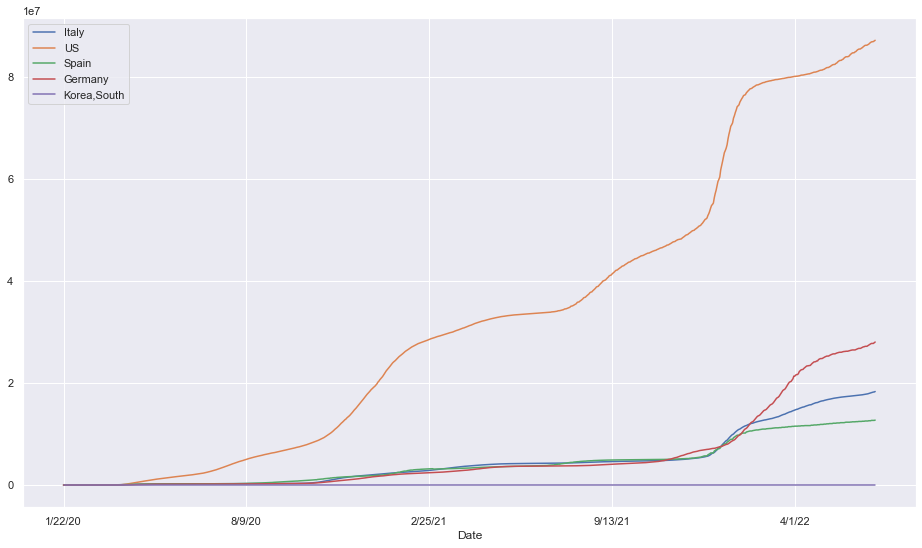

In [13]:
df_plot.set_index('Date').plot()

# Conversion of Date Objects

In [14]:
df_plot.head()

,Date,Italy,US,Spain,Germany,"Korea,South"
0,1/22/20,0,1,0,0,0.0
1,1/23/20,0,1,0,0,0.0
2,1/24/20,0,2,0,0,0.0
3,1/25/20,0,2,0,0,0.0
4,1/26/20,0,5,0,0,0.0


In [15]:
from datetime import datetime

In [16]:
df_plot.Date[0]

'1/22/20'

In [17]:
datetime.strptime(df_plot.Date[0], '%m/%d/%y')

datetime.datetime(2020, 1, 22, 0, 0)

In [18]:
time_idx=[datetime.strptime(each, '%m/%d/%y') for each in df_plot.Date]
time_str=[each.strftime('%Y-%m-%d') for each in time_idx]

In [19]:
time_idx

[datetime.datetime(2020, 1, 22, 0, 0),
 datetime.datetime(2020, 1, 23, 0, 0),
 datetime.datetime(2020, 1, 24, 0, 0),
 datetime.datetime(2020, 1, 25, 0, 0),
 datetime.datetime(2020, 1, 26, 0, 0),
 datetime.datetime(2020, 1, 27, 0, 0),
 datetime.datetime(2020, 1, 28, 0, 0),
 datetime.datetime(2020, 1, 29, 0, 0),
 datetime.datetime(2020, 1, 30, 0, 0),
 datetime.datetime(2020, 1, 31, 0, 0),
 datetime.datetime(2020, 2, 1, 0, 0),
 datetime.datetime(2020, 2, 2, 0, 0),
 datetime.datetime(2020, 2, 3, 0, 0),
 datetime.datetime(2020, 2, 4, 0, 0),
 datetime.datetime(2020, 2, 5, 0, 0),
 datetime.datetime(2020, 2, 6, 0, 0),
 datetime.datetime(2020, 2, 7, 0, 0),
 datetime.datetime(2020, 2, 8, 0, 0),
 datetime.datetime(2020, 2, 9, 0, 0),
 datetime.datetime(2020, 2, 10, 0, 0),
 datetime.datetime(2020, 2, 11, 0, 0),
 datetime.datetime(2020, 2, 12, 0, 0),
 datetime.datetime(2020, 2, 13, 0, 0),
 datetime.datetime(2020, 2, 14, 0, 0),
 datetime.datetime(2020, 2, 15, 0, 0),
 datetime.datetime(2020, 2, 16, 0,

In [20]:
df_plot['Date']=time_idx
type(df_plot['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [21]:
df_plot.head()

,Date,Italy,US,Spain,Germany,"Korea,South"
0,2020-01-22,0,1,0,0,0.0
1,2020-01-23,0,1,0,0,0.0
2,2020-01-24,0,2,0,0,0.0
3,2020-01-25,0,2,0,0,0.0
4,2020-01-26,0,5,0,0,0.0


In [22]:
df_plot.to_csv('processed.csv', sep=';', index=False)

In [23]:
df_plot

,Date,Italy,US,Spain,Germany,"Korea,South"
0,2020-01-22,0,1,0,0,0.0
1,2020-01-23,0,1,0,0,0.0
2,2020-01-24,0,2,0,0,0.0
3,2020-01-25,0,2,0,0,0.0
4,2020-01-26,0,5,0,0,0.0
...,...,...,...,...,...,...
884,2022-06-24,18128044,86909476,12681820,27771111,0.0
885,2022-06-25,18184917,86948848,12681820,27771112,0.0
886,2022-06-26,18234242,86967399,12681820,27771911,0.0
887,2022-06-27,18259261,87092233,12681820,27914240,0.0


# Relational data model - defining a primary key

In the relational model of databases, a primary key is a specific choice of a minimal set of attributes (columns) that uniquely specify a tuple (row) in a relation (table) (source: wiki)

A primary key’s main features are:

It must contain a unique value for each row of data.
It cannot contain null values.

In [24]:
import pandas as pd

In [25]:
datapath= 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [26]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22,6/28/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,181666,181725,181808,181912,181987,182033,182072,182149,182228,182324
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,277409,277444,277663,277940,278211,278504,278793,279077,279077,279167
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265975,265985,265993,266006,266015,266025,266030,266038,266049,266062
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43449,43449,43449,43774,43774,43774,43774,43774,43774,43774
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,101320


In [27]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country','Province/State':'state' })

In [28]:
pd_data_base

,state,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22,6/28/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,181666,181725,181808,181912,181987,182033,182072,182149,182228,182324
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,277409,277444,277663,277940,278211,278504,278793,279077,279077,279167
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,265975,265985,265993,266006,266015,266025,266030,266038,266049,266062
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,43449,43449,43449,43774,43774,43774,43774,43774,43774,43774
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,101320
5,NaN,Antarctica,-71.949900,23.347000,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
6,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,8581,8581,8581,8590,8590,8625,8625,8625,8625,8625
7,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,9341492,9341492,9341492,9341492,9341492,9341492,9341492,9367172,9367172,9367172
8,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,423044,423104,423104,423104,423104,423104,423104,423104,423243,423243
9,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,147096,147942,148996,150123,151113,152199,153012,153939,155047,156472


In [29]:
pd_data_base=pd_data_base.drop(['Lat', 'Long'], axis=1)

In [30]:
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/19/22,6/20/22,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22,6/28/22
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,181666,181725,181808,181912,181987,182033,182072,182149,182228,182324
1,NaN,Albania,0,0,0,0,0,0,0,0,...,277409,277444,277663,277940,278211,278504,278793,279077,279077,279167
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,265975,265985,265993,266006,266015,266025,266030,266038,266049,266062
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,43449,43449,43449,43774,43774,43774,43774,43774,43774,43774
4,NaN,Angola,0,0,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,101320


In [31]:
pd_data_base.set_index(['state','country'])

1/22/20  \
state                                        country                                     
NaN                                          Afghanistan                             0   
                                             Albania                                 0   
                                             Algeria                                 0   
                                             Andorra                                 0   
                                             Angola                                  0   
                                             Antarctica                              0   
                                             Antigua and Barbuda                     0   
                                             Argentina                               0   
                                             Armenia                                 0   
Australian Capital Territory                 Australia                               0   
New South Wales                              Australia                               0   
Northern Territory                           Australia                               0   
Queensland                                   Australia                               0   
South Australia                              Australia                               0   
Tasmania                                     Australia                               0   
Victoria                                     Australia                               0   
Western Australia                            Australia                               0   
NaN                                          Austria                                 0   
                                             Azerbaijan                              0   
                                             Bahamas                                 0   
                                             Bahrain                                 0   
                                             Bangladesh                              0   
                                             Barbados                                0   
                                             Belarus                                 0   
                                             Belgium                                 0   
                                             Belize                                  0   
                                             Benin                                   0   
                                             Bhutan                                  0   
                                             Bolivia                                 0   
                                             Bosnia and Herzegovina                  0   
                                             Botswana                                0   
                                             Brazil                                  0   
                                             Brunei                                  0   
                                             Bulgaria                                0   
                                             Burkina Faso                            0   
                                             Burma                                   0   
                                             Burundi                                 0   
                                             Cabo Verde                              0   
                                             Cambodia                                0   
                                             Cameroon                                0   
Alberta                                      Canada                                  0   
British Columbia                             Canada                                  0   
Diamond Princess                             Canada                                  0   
Grand Princess               

In [32]:
test_pd=pd_data_base.set_index(['state','country']).T
test_pd

state           NaN                                             \
country Afghanistan Albania Algeria Andorra  Angola Antarctica   
1/22/20           0       0       0       0       0          0   
1/23/20           0       0       0       0       0          0   
1/24/20           0       0       0       0       0          0   
1/25/20           0       0       0       0       0          0   
1/26/20           0       0       0       0       0          0   
...             ...     ...     ...     ...     ...        ...   
6/24/22      182033  278504  266025   43774   99761         11   
6/25/22      182072  278793  266030   43774   99761         11   
6/26/22      182149  279077  266038   43774   99761         11   
6/27/22      182228  279077  266049   43774   99761         11   
6/28/22      182324  279167  266062   43774  101320         11   

state                                         Australian Capital Territory  \
country Antigua and Barbuda Argentina Armenia                    Australia   
1/22/20                   0         0       0                            0   
1/23/20                   0         0       0                            0   
1/24/20                   0         0       0                            0   
1/25/20                   0         0       0                            0   
1/26/20                   0         0       0                            0   
...                     ...       ...     ...                          ...   
6/24/22                8625   9341492  423104                       152199   
6/25/22                8625   9341492  423104                       153012   
6/26/22                8625   9367172  423104                       153939   
6/27/22                8625   9367172  423243                       155047   
6/28/22                8625   9367172  423243                       156472   

state    ...     NaN                                         \
country  ... Uruguay Uzbekistan Vanuatu Venezuela   Vietnam   
1/22/20  ...       0          0       0         0         0   
1/23/20  ...       0          0       0         0         2   
1/24/20  ...       0          0       0         0         2   
1/25/20  ...       0          0       0         0         2   
1/26/20  ...       0          0       0         0         2   
...      ...     ...        ...     ...       ...       ...   
6/24/22  ...  951948     240087   11044    525539  10742234   
6/25/22  ...  951948     240206   11044    525716  10742891   
6/26/22  ...  951948     240345   11173    525782  10743448   
6/27/22  ...  957629     240478   11174    525827  10744085   
6/28/22  ...  957629     240569   11206    525827  10744854   

state                                                                    
country West Bank and Gaza Winter Olympics 2022  Yemen  Zambia Zimbabwe  
1/22/20                  0                    0      0       0        0  
1/23/20                  0                    0      0       0        0  
1/24/20                  0                    0      0       0        0  
1/25/20                  0                    0      0       0        0  
1/26/20                  0                    0      0       0        0  
...                    ...                  ...    ...     ...      ...  
6/24/22             658503                  535  11824  325110   255309  
6/25/22             658503                  535  11824  325110   255309  
6/26/22             658503                  535  11824  325110   255355  
6/27/22             659853                  535  11824  325348   255383  
6/28/22             659853                  535  11824  325498   255383  

[889 rows x 285 columns]

In [33]:
test_pd.columns

MultiIndex([(                           nan,          'Afghanistan'),
            (                           nan,              'Albania'),
            (                           nan,              'Algeria'),
            (                           nan,              'Andorra'),
            (                           nan,               'Angola'),
            (                           nan,           'Antarctica'),
            (                           nan,  'Antigua and Barbuda'),
            (                           nan,            'Argentina'),
            (                           nan,              'Armenia'),
            ('Australian Capital Territory',            'Australia'),
            ...
            (                           nan,              'Uruguay'),
            (                           nan,           'Uzbekistan'),
            (                           nan,              'Vanuatu'),
            (                           nan,            'Venezuela'),
    

In [34]:
test_pd.stack(level=[0,1]).reset_index()

,level_0,state,country,0
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0
...,...,...,...,...
253360,6/28/22,Western Australia,Australia,898402.0
253361,6/28/22,Xinjiang,China,1008.0
253362,6/28/22,Yukon,Canada,4468.0
253363,6/28/22,Yunnan,China,2174.0


In [35]:
pd_relational_model=pd_data_base.set_index(['state', 'country'])\
.T \
.stack(level=[0,1]) \
.reset_index() \
.rename(columns={'level_0':'date', 0:'confirmed'},
       )

In [36]:
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0


In [37]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [38]:
pd_relational_model.to_csv('COVID_relational_confirmed.csv', sep = ';', index = None)

In [39]:
print(pd_relational_model[pd_relational_model['country']=='US'].tail())

           date state country   confirmed
252121  6/24/22   NaN      US  86909476.0
252406  6/25/22   NaN      US  86948848.0
252691  6/26/22   NaN      US  86967399.0
252976  6/27/22   NaN      US  87092233.0
253261  6/28/22   NaN      US  87217673.0
